In [2]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# style
from ipynb.fs.full.i_Style_Sheet import *
plt.style.use(style_use)
plt.rcParams.update(style_params)

# ColorSpace
from ipynb.fs.full.ii_ColorSpace import colorspace
hex_base = '89F4EC'
palettes = colorspace(hex_base)
p = palettes['Switch Palette']

In [3]:
# national survey of family growth
f = r'Data\nsfg_national_survey_of_family_growth.hdf5'
nsfg = pd.read_hdf(f)

# define birthwgt & preterm
nsfg['birthwgt'] = nsfg['birthwgt_lb1'] + (nsfg['birthwgt_oz1']/16)
nsfg['birthwgt'].replace([104.1250], np.nan, inplace=True)
nsfg['preterm'] = np.where(nsfg['prglngth']<37,'Pre','Full')

# show
nsfg

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015,birthwgt,preterm
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843,5.2500,Full
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843,4.7500,Pre
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843,5.2500,Pre
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358,NaN,Pre
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914,8.8125,Full
...,...,...,...,...,...,...,...,...,...,...,...,...
9353,70615,1,4.0,11.0,35,1.0,1758,1825.0,22.0,8117.554461,4.6875,Pre
9354,70616,1,8.0,7.0,42,1.0,1741,1816.0,18.0,6842.240477,8.4375,Full
9355,70616,1,7.0,6.0,36,1.0,2091,2158.0,23.0,6842.240477,7.3750,Pre
9356,70619,1,8.0,3.0,41,1.0,3450,3525.0,31.0,3856.253532,8.1875,Full


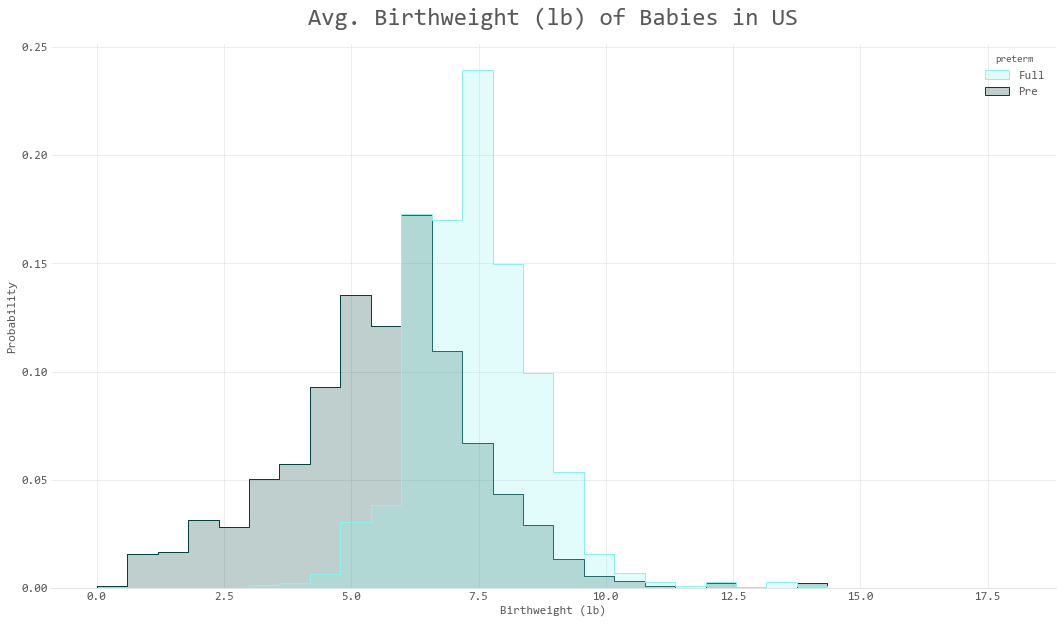

In [4]:
# viz
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

sns.histplot(ax=ax, data=nsfg, x='birthwgt', stat='probability',
             common_norm=False, element='step', bins=30, hue='preterm',
            palette=p[:2])

ax.set_title('Avg. Birthweight (lb) of Babies in US')
ax.set_xlabel('Birthweight (lb)')

#fig.savefig('birthwgt.png')

plt.show()